# RETO 2 MACHINE LEARNING: BALANCE DE CLASES.

A Continuación se trata de hacer clasificación de dos clases etiquetadas como '1' y '0', en donde la clase '0' tiene muchas mas muestras que la '1', por lo cual el algoritmo de clasificación se puede ver sesgado. Esto se puede resolver utilizando algunas técnicas de balance de clases.

In [4]:
#Cabecera de librerías.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from pandas import DataFrame
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import tree



In [5]:
#Cargo la base de datos.
dataset= r'dataset.csv'
Base_Datos= pd.read_csv(dataset)
Base_Datos= np.array(Base_Datos)
Dato_X_Fold= Base_Datos[0:800,1:3]  #Almacena X y Y si tiene 1:3 en columnas
Dato_X_Fold= np.vstack([Dato_X_Fold,Base_Datos[1100:1107,1:3]]) #Almaceno los datos que van a estar en el Fold y los que son solo para Test
#print Dato_X_Fold
Dato_Y_Fold= Base_Datos[0:1110,2] #Inutilizado
#print Dato_Y_Fold
Etiqueta_Fold= Base_Datos[0:800,3] #Etiquetas de los datos
Etiqueta_Fold= np.append(Etiqueta_Fold,Base_Datos[1100:1107,3]) #Etiquetas del conjunto de datos para el Fold


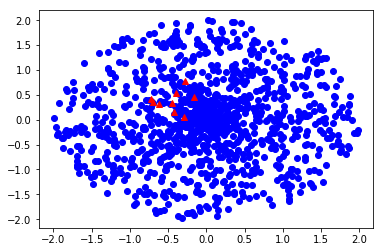

In [6]:
Dato_x0= Base_Datos[0:1100,1] #Almacena X y Y si tiene 1:3 en columnas
Dato_y0= Base_Datos[0:1100,2]
Dato_x1= Base_Datos[1101:1110,1] #Almacena X y Y si tiene 1:3 en columnas
Dato_y1= Base_Datos[1101:1110,2]
plt.figure(1)
plt.plot(Dato_x0,Dato_y0,'bo',Dato_x1,Dato_y1,'r^')
plt.show()

In [14]:
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(Dato_X_Fold)
#print kf
for train_index, test_index in kf.split(Dato_X_Fold):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Dato_X_Fold[train_index], Dato_X_Fold[test_index]
    y_train, y_test = Etiqueta_Fold[train_index], Etiqueta_Fold[test_index]

#print X_test


('TRAIN:', array([  0,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  15,  16,
        17,  18,  19,  21,  22,  23,  25,  27,  28,  31,  32,  33,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  48,  49,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,
        95,  96,  98,  99, 100, 101, 102, 103, 104, 107, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 159, 160, 161, 162, 163, 164, 165, 166,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 179, 181, 182, 183,
       184, 185, 187, 188, 189, 190, 192, 193, 195, 196, 198, 199, 200,
       201, 202, 204, 206, 207, 208, 210, 212, 213, 2

In [24]:
clf_TDC = tree.DecisionTreeClassifier() # Clasificador por Arbol de Decisión
clf_TDC = clf_TDC.fit(X_train,y_train) # Entrenamiento con los datos
TDC_predict=clf_TDC.predict(X_test) # Prueba
prueba=[X_test,y_test]
print X_train.shape
print prueba
print TDC_predict

(646L, 2L)
[array([[ 0.15510829,  0.97775991],
       [-1.44181062,  0.32094044],
       [ 1.20137991, -1.1719253 ],
       [ 1.82805951, -0.69164651],
       [-1.78768131, -0.62838128],
       [ 0.534817  , -0.5851895 ],
       [ 0.28953204,  0.01586028],
       [-0.81300064,  0.82865744],
       [-0.70342699,  0.32598234],
       [ 0.15045269, -0.63649084],
       [ 1.1817609 , -0.77821767],
       [-0.1566666 , -1.91731529],
       [-0.68508664, -1.08052909],
       [ 0.79119761, -0.38786199],
       [ 0.0654853 ,  0.38944131],
       [ 1.07373507, -1.63238547],
       [-0.48889802,  1.58630428],
       [ 0.20007492, -0.7430964 ],
       [ 1.77974949,  0.05176249],
       [-0.17103442, -0.34186469],
       [ 0.03486469, -0.00579479],
       [ 0.05623188,  0.32704526],
       [ 0.15515378,  0.01242907],
       [ 0.1558864 , -0.10969269],
       [-0.57878515, -1.15923628],
       [-1.64632558, -0.12335252],
       [-0.72816241,  0.25115024],
       [ 0.33510603, -0.14159344],
       [

(646L,)
(646L,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1

<function matplotlib.pyplot.show>

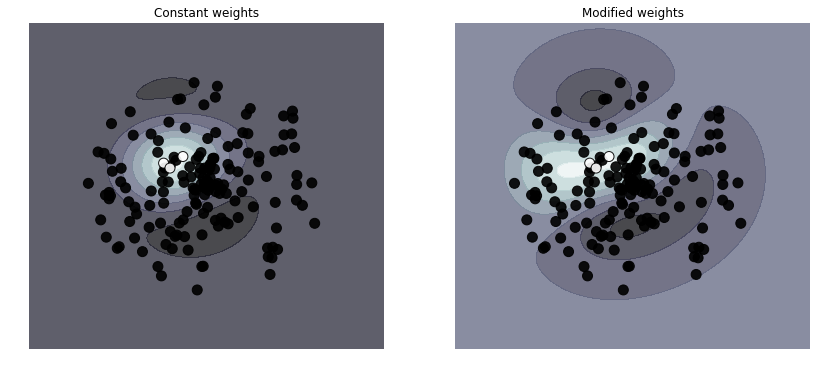

In [16]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

sample_weight_last_ten = np.ones(len(X_train))
print sample_weight_last_ten.shape
sample_weight_equal = np.ones(len(X_train))
print sample_weight_last_ten.shape
sample_weight_last_ten[-5:] = 20
clf_weights= svm.SVC(gamma=1)
clf_weights.fit(X_train, y_train, sample_weight=sample_weight_last_ten)
clf_no_weights= svm.SVC(gamma=1)
clf_no_weights.fit(X_train, y_train, sample_weight=sample_weight_equal)
clf_SVC=clf_weights.predict(X_test)
clf_SVC_nw=clf_no_weights.predict(X_test)

print sample_weight_last_ten
print clf_SVC
fig, axes= plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_weights, sample_weight_equal, axes[0],'Constant weights')
plot_decision_function(clf_no_weights, sample_weight_last_ten, axes[1],'Modified weights')
plt.show



In [303]:
print X_test[29,:]
clf_TDC.predict([X_test[29,:]])

[-0.02877086 -0.0435941 ]


array([0.])

In [22]:
## EVALUACIÓN CON F1-SCORE
y_true=y_test
y_pred=clf_SVC
f1_score(y_true,y_pred,average='macro')

0.6853420195439739

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=2, class_sep=2,
 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
 n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_test[], y_test)
print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 900, 1: 900})

SyntaxError: invalid syntax (<ipython-input-13-c8d0d7d29d88>, line 12)